Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [2]:
from pathlib import Path
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
## If you are using the data by mounting the google drive, use the following :
#from google.colab import drive
#drive.mount('/content/gdrive')
current_path = os.getcwd()
print("Current working directory:", current_path)
##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Current working directory: C:\Users\caron\CNN assignment


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [5]:
# Defining the path for train and test images
data_dir_train = Path("C:/Users/caron/CNN assignment/Skin/SkinModel/Train")
data_dir_test = Path('C:/Users/caron/CNN assignment/Skin/SkinModel/Test')

In [6]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [7]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [8]:
## Wrote train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(seed=123,image_size=(img_height,img_width),batch_size=batch_size,directory=data_dir_train,validation_split=.2,subset='training')

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [9]:
## Wrote validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.utils.image_dataset_from_directory(seed=123,image_size=(img_height,img_width),batch_size=batch_size,directory=data_dir_train,validation_split=.2,subset='validation')

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [10]:
# Listed out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Created a code to visualize one instance of all the nine classes present in the dataset

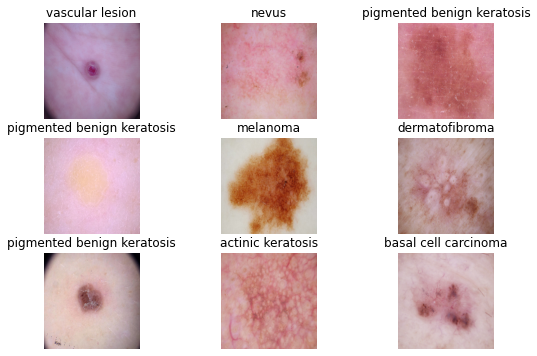

In [11]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(9, 6))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Created a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [66]:
num_classes = 9
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [67]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

### Train the model

In [68]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 50s 757ms/step - loss: 2.0336 - accuracy: 0.2266 - val_loss: 1.9067 - val_accuracy: 0.3199
Epoch 2/20
56/56 [==============================] - 41s 734ms/step - loss: 1.7963 - accuracy: 0.3471 - val_loss: 1.7469 - val_accuracy: 0.4027
Epoch 3/20
56/56 [==============================] - 42s 753ms/step - loss: 1.6007 - accuracy: 0.4325 - val_loss: 1.5647 - val_accuracy: 0.4094
Epoch 4/20
56/56 [==============================] - 42s 758ms/step - loss: 1.4876 - accuracy: 0.4760 - val_loss: 1.5038 - val_accuracy: 0.5034
Epoch 5/20
56/56 [==============================] - 43s 776ms/step - loss: 1.4227 - accuracy: 0.4978 - val_loss: 1.3916 - val_accuracy: 0.5302
Epoch 6/20
56/56 [==============================] - 45s 810ms/step - loss: 1.3125 - accuracy: 0.5324 - val_loss: 1.3716 - val_accuracy: 0.5257
Epoch 7/20
56/56 [==============================] - 46s 828ms/step - loss: 1.2749 - accuracy: 0.5446 - val_loss: 1.3011 - val_accuracy: 0.5459

### Visualizing training results

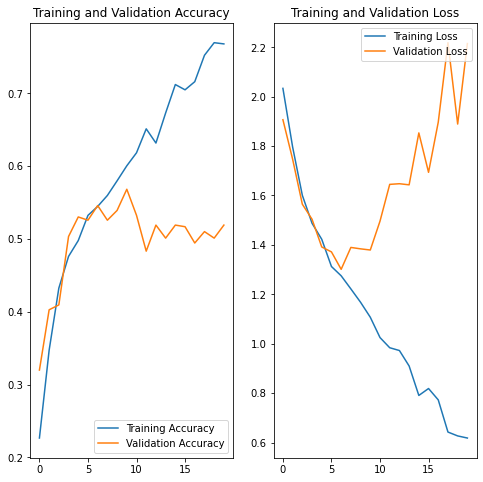

In [69]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### The model is clearly overfit


### Write your findings here

In [13]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
  featurewise_center=True,
  featurewise_std_normalization=True,
  rotation_range=20,
  width_shift_range=0.2,
  height_shift_range=0.2,
  horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [14]:
train_generator = train_datagen.flow_from_directory(
  data_dir_train,
  target_size=(180, 180),
  batch_size=32,
  class_mode='categorical')

Found 2239 images belonging to 9 classes.


In [15]:
validation_generator = test_datagen.flow_from_directory(
  data_dir_test,
  target_size=(180, 180),
  batch_size=32,
  class_mode='categorical')

Found 118 images belonging to 9 classes.


In [16]:
from PIL import Image
image_files = os.listdir(data_dir_train)

image_list = []

for image_file in image_files:
    try:
        image = Image.open(os.path.join(data_dir_train, image_file))
        image_array = np.array(image)
        image_list.append(image_array)
    except PermissionError:
        print("Permission denied, skipping the file:")
# Convert the list of image arrays into a single NumPy array
images_array = np.array(image_list)

try:
    train_datagen.fit(np.load(data_dir_train),180,180,3)
except PermissionError:
    print("Permission denied, skipping the file:")

Permission denied, skipping the file:
Permission denied, skipping the file:
Permission denied, skipping the file:
Permission denied, skipping the file:
Permission denied, skipping the file:
Permission denied, skipping the file:
Permission denied, skipping the file:
Permission denied, skipping the file:
Permission denied, skipping the file:
Permission denied, skipping the file:


In [159]:
model = tf.keras.Sequential([tf.keras.layers.Rescaling(1./255),
                             tf.keras.layers.RandomFlip('horizontal_and_vertical'),
                             tf.keras.layers.RandomRotation(0.2),
                             tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
                             tf.keras.layers.MaxPooling2D(),
                             tf.keras.layers.Conv2D(32, 3, activation='relu'),
                             tf.keras.layers.MaxPooling2D(),
                             tf.keras.layers.Conv2D(64, 3, activation='relu'),
      tf.keras.layers.MaxPooling2D(),
      tf.keras.layers.Conv2D(32, 3, activation='relu'),
      tf.keras.layers.MaxPooling2D(),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(num_classes)])

In [160]:
#get_random_transform()
#random_transform()
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [163]:
history = model.fit(train_ds,
  epochs=50,
  validation_data=val_ds,
                   verbose=0)

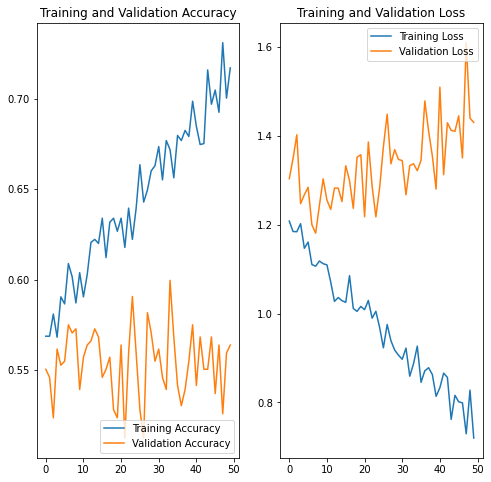

In [165]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

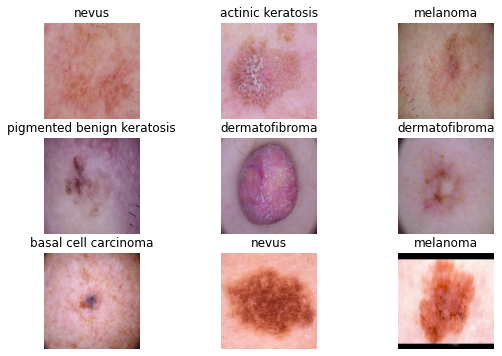

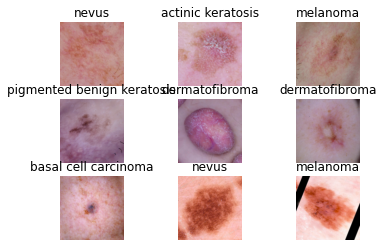

In [25]:
plt.figure(figsize=(9, 6))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
    plt.show()
    for i in range(9):
        augmented_image = data_augmentation(images[i])
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_image.numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
    plt.show()

### Todo:
### Create the model, compile and train the model


In [27]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
num_classes = 9
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.RandomFlip('horizontal_and_vertical'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes)
])

### Compiling the model

In [28]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

### Training the model

In [30]:
## Your code goes here, note: train your model for 20 epochs
history = model.fit(train_ds,
  epochs=50,
  validation_data=val_ds)

Epoch 1/50
56/56 [==============================] - 38s 689ms/step - loss: 2.0347 - accuracy: 0.1942 - val_loss: 2.0051 - val_accuracy: 0.2617
Epoch 2/50
56/56 [==============================] - 38s 671ms/step - loss: 1.9566 - accuracy: 0.2444 - val_loss: 1.8683 - val_accuracy: 0.2953
Epoch 3/50
56/56 [==============================] - 38s 671ms/step - loss: 1.8837 - accuracy: 0.2885 - val_loss: 1.7952 - val_accuracy: 0.3356
Epoch 4/50
56/56 [==============================] - 38s 677ms/step - loss: 1.8353 - accuracy: 0.2985 - val_loss: 1.7766 - val_accuracy: 0.3065
Epoch 5/50
56/56 [==============================] - 38s 675ms/step - loss: 1.7191 - accuracy: 0.3605 - val_loss: 1.6807 - val_accuracy: 0.4228
Epoch 6/50
56/56 [==============================] - 39s 696ms/step - loss: 1.7127 - accuracy: 0.3650 - val_loss: 1.6561 - val_accuracy: 0.3893
Epoch 7/50
56/56 [==============================] - 37s 654ms/step - loss: 1.6246 - accuracy: 0.3890 - val_loss: 1.5681 - val_accuracy: 0.4116

### Visualizing the results

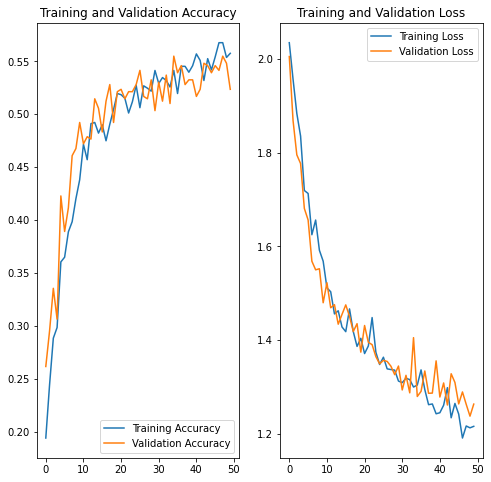

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

The overfitting problem seems to be solved, however the accuracy is still mediocre

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [33]:
folders = os.listdir(data_dir_train)

for folder in folders:
    folder_path = os.path.join(data_dir_train, folder)
    
    if os.path.isdir(folder_path):
        num_jpgs = sum(1 for file in os.listdir(folder_path) if file.lower().endswith(".jpg"))
        print(f"Folder {folder} contains {num_jpgs} JPEG files.")

Folder actinic keratosis contains 114 JPEG files.
Folder basal cell carcinoma contains 376 JPEG files.
Folder dermatofibroma contains 95 JPEG files.
Folder melanoma contains 438 JPEG files.
Folder nevus contains 357 JPEG files.
Folder pigmented benign keratosis contains 462 JPEG files.
Folder seborrheic keratosis contains 77 JPEG files.
Folder squamous cell carcinoma contains 181 JPEG files.
Folder vascular lesion contains 139 JPEG files.


#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
seborrheic keratosis has the least amount of samples
#### - Which classes dominate the data in terms proportionate number of samples?
pigmented benign keratosis has the most amount of samples

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [34]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [40]:
path_to_training_dataset="C:/Users/caron/CNN assignment/Skin/SkinModel/Train"
import Augmentor
for i in class_names:
    print(path_to_training_dataset +'/'+ i)
    p = Augmentor.Pipeline(path_to_training_dataset +'/'+ i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

C:/Users/caron/CNN assignment/Skin/SkinModel/Train/actinic keratosis
Initialised with 114 image(s) found.
Output directory set to C:/Users/caron/CNN assignment/Skin/SkinModel/Train/actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x148103C3A60>: 100%|█| 500/500 [00:07<00:00, 69.51 Samples/


C:/Users/caron/CNN assignment/Skin/SkinModel/Train/basal cell carcinoma
Initialised with 376 image(s) found.
Output directory set to C:/Users/caron/CNN assignment/Skin/SkinModel/Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1482B83B310>: 100%|█| 500/500 [00:07<00:00, 68.22 Samples/


C:/Users/caron/CNN assignment/Skin/SkinModel/Train/dermatofibroma
Initialised with 95 image(s) found.
Output directory set to C:/Users/caron/CNN assignment/Skin/SkinModel/Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1482BA90640>: 100%|█| 500/500 [00:07<00:00, 69.20 Samples/


C:/Users/caron/CNN assignment/Skin/SkinModel/Train/melanoma
Initialised with 438 image(s) found.
Output directory set to C:/Users/caron/CNN assignment/Skin/SkinModel/Train/melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1482BF539D0>: 100%|█| 500/500 [00:45<00:00, 11.08 Samples


C:/Users/caron/CNN assignment/Skin/SkinModel/Train/nevus
Initialised with 357 image(s) found.
Output directory set to C:/Users/caron/CNN assignment/Skin/SkinModel/Train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x1482BAAAB20>: 100%|█| 500/500 [00:40<00:00, 12.50 Samples/


C:/Users/caron/CNN assignment/Skin/SkinModel/Train/pigmented benign keratosis
Initialised with 462 image(s) found.
Output directory set to C:/Users/caron/CNN assignment/Skin/SkinModel/Train/pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1482B7C8A30>: 100%|█| 500/500 [00:07<00:00, 66.23 Samples/


C:/Users/caron/CNN assignment/Skin/SkinModel/Train/seborrheic keratosis
Initialised with 77 image(s) found.
Output directory set to C:/Users/caron/CNN assignment/Skin/SkinModel/Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1482BF2F520>: 100%|█| 500/500 [00:19<00:00, 25.91 Samples


C:/Users/caron/CNN assignment/Skin/SkinModel/Train/squamous cell carcinoma
Initialised with 181 image(s) found.
Output directory set to C:/Users/caron/CNN assignment/Skin/SkinModel/Train/squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x148259FD5B0>: 100%|█| 500/500 [00:08<00:00, 62.20 Samples/


C:/Users/caron/CNN assignment/Skin/SkinModel/Train/vascular lesion
Initialised with 139 image(s) found.
Output directory set to C:/Users/caron/CNN assignment/Skin/SkinModel/Train/vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1482BF5F790>: 100%|█| 500/500 [00:08<00:00, 61.02 Samples/


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [41]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [44]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['C:\\Users\\caron\\CNN assignment\\Skin\\SkinModel\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_3bff192e-0a08-4178-8b7e-ef71ada9bddd.jpg',
 'C:\\Users\\caron\\CNN assignment\\Skin\\SkinModel\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_6b21bf21-0ee0-4fd9-b72b-4aec40c48a63.jpg',
 'C:\\Users\\caron\\CNN assignment\\Skin\\SkinModel\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_78d5f28e-6932-47b6-965b-d145a0674af2.jpg',
 'C:\\Users\\caron\\CNN assignment\\Skin\\SkinModel\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_9579b6be-f8ff-4241-8b39-bdad3dbac123.jpg',
 'C:\\Users\\caron\\CNN assignment\\Skin\\SkinModel\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_e0b560f6-e2ba-48f5-bfc4-e1963845acc1.jpg',
 'C:\\Users\\caron\\CNN assignment\\Skin\\SkinModel\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg

In [84]:
original_df = {}
for i in class_names:
    path_list_old = [x for x in glob(os.path.join(data_dir_train,i, '*.jpg'))]
    for j in path_list_old:
        original_df[j] = i
original_df

{'C:\\Users\\caron\\CNN assignment\\Skin\\SkinModel\\Train\\actinic keratosis\\ISIC_0025780.jpg': 'actinic keratosis',
 'C:\\Users\\caron\\CNN assignment\\Skin\\SkinModel\\Train\\actinic keratosis\\ISIC_0025803.jpg': 'actinic keratosis',
 'C:\\Users\\caron\\CNN assignment\\Skin\\SkinModel\\Train\\actinic keratosis\\ISIC_0025825.jpg': 'actinic keratosis',
 'C:\\Users\\caron\\CNN assignment\\Skin\\SkinModel\\Train\\actinic keratosis\\ISIC_0025953.jpg': 'actinic keratosis',
 'C:\\Users\\caron\\CNN assignment\\Skin\\SkinModel\\Train\\actinic keratosis\\ISIC_0025957.jpg': 'actinic keratosis',
 'C:\\Users\\caron\\CNN assignment\\Skin\\SkinModel\\Train\\actinic keratosis\\ISIC_0025992.jpg': 'actinic keratosis',
 'C:\\Users\\caron\\CNN assignment\\Skin\\SkinModel\\Train\\actinic keratosis\\ISIC_0026040.jpg': 'actinic keratosis',
 'C:\\Users\\caron\\CNN assignment\\Skin\\SkinModel\\Train\\actinic keratosis\\ISIC_0026149.jpg': 'actinic keratosis',
 'C:\\Users\\caron\\CNN assignment\\Skin\\SkinMo

In [45]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]


['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [61]:
for i in class_names:
    lesion_list_old = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train,'*',i, '*.jpg'))]
lesion_list_old

[]

In [82]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))
dataframe_dict_new

{'C:\\Users\\caron\\CNN assignment\\Skin\\SkinModel\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_3bff192e-0a08-4178-8b7e-ef71ada9bddd.jpg': 'actinic keratosis',
 'C:\\Users\\caron\\CNN assignment\\Skin\\SkinModel\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_6b21bf21-0ee0-4fd9-b72b-4aec40c48a63.jpg': 'actinic keratosis',
 'C:\\Users\\caron\\CNN assignment\\Skin\\SkinModel\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_78d5f28e-6932-47b6-965b-d145a0674af2.jpg': 'actinic keratosis',
 'C:\\Users\\caron\\CNN assignment\\Skin\\SkinModel\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_9579b6be-f8ff-4241-8b39-bdad3dbac123.jpg': 'actinic keratosis',
 'C:\\Users\\caron\\CNN assignment\\Skin\\SkinModel\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_e0b560f6-e2ba-48f5-bfc4-e1963845acc1.jpg': 'actinic keratosis',
 'C:\\Users\\caron\\CNN a

In [92]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
df2['Label'].value_counts()

actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: Label, dtype: int64

In [93]:
df1 = pd.DataFrame(list(original_df.items()),columns = ['Path','Label'])
df1['Label'].value_counts()

pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: Label, dtype: int64

In [94]:
new_df = pd.concat([df1,df2])
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [95]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [98]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [99]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset='validation',## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [100]:
num_classes = 9
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.RandomFlip('horizontal_and_vertical'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes)
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [101]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

#### **Todo:**  Train your model

In [104]:
epochs = 50
## Your code goes here, use 50 epochs.
history = model.fit(train_ds,epochs=epochs,validation_data = val_ds)

Epoch 1/50
169/169 [==============================] - 124s 727ms/step - loss: 2.0342 - accuracy: 0.1958 - val_loss: 1.7942 - val_accuracy: 0.2747
Epoch 2/50
169/169 [==============================] - 132s 774ms/step - loss: 1.7577 - accuracy: 0.3201 - val_loss: 1.5906 - val_accuracy: 0.4076
Epoch 3/50
169/169 [==============================] - 131s 770ms/step - loss: 1.6073 - accuracy: 0.3837 - val_loss: 1.6060 - val_accuracy: 0.3719
Epoch 4/50
169/169 [==============================] - 145s 852ms/step - loss: 1.5558 - accuracy: 0.4050 - val_loss: 1.5553 - val_accuracy: 0.3912
Epoch 5/50
169/169 [==============================] - 145s 847ms/step - loss: 1.5168 - accuracy: 0.4126 - val_loss: 1.4894 - val_accuracy: 0.4336
Epoch 6/50
169/169 [==============================] - 134s 786ms/step - loss: 1.4840 - accuracy: 0.4188 - val_loss: 1.4396 - val_accuracy: 0.4321
Epoch 7/50
169/169 [==============================] - 129s 758ms/step - loss: 1.4499 - accuracy: 0.4319 - val_loss: 1.4002 -

#### **Todo:**  Visualize the model results

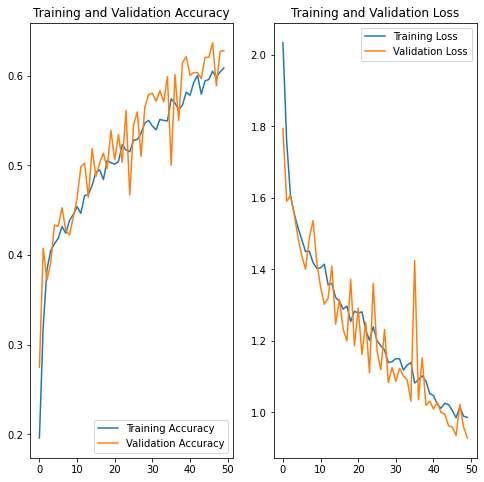

In [105]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



Class rebalance helped alot. The model doesnt seem to be overfitting, and maybe could be run another 50 epochs or more.